<a href="https://colab.research.google.com/github/DaksheshGautam/Data-Practice/blob/main/FE_handling_missing_num_simple_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [12]:
df = pd.read_csv('titanic_toy.csv')

In [13]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [15]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [21]:
X = df.drop(columns = ['Survived'])
Y = df['Survived']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [25]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [26]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [27]:
X_train['mean_age'] = X_train['Age'].fillna(mean_age)
X_train['median_age'] = X_train['Age'].fillna(median_age)

X_train['mean_fare'] = X_train['Fare'].fillna(mean_fare)
X_train['median_fare'] = X_train['Fare'].fillna(median_fare)

In [28]:
X_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
647,56.0,35.5000,0,56.000000,56.00,35.5000,35.5000
359,NaN,7.8792,0,29.785904,28.75,7.8792,7.8792
241,NaN,15.5000,1,29.785904,28.75,15.5000,15.5000
72,21.0,73.5000,0,21.000000,21.00,73.5000,73.5000
560,NaN,7.7500,0,29.785904,28.75,7.7500,7.7500


In [29]:
print('Original Age Variance:', X_train['Age'].var())
print('Mean Age Variance:', X_train['mean_age'].var())
print('Median Age Variance:', X_train['median_age'].var())

print('Original Fare Variance:', X_train['Fare'].var())
print('Mean Fare Variance:', X_train['mean_fare'].var())
print('Median Fare Variance:', X_train['median_fare'].var())

Original Age Variance: 204.3495133904614
Mean Age Variance: 161.81262452718673
Median Age Variance: 161.9895663346054
Original Fare Variance: 2448.197913706318
Mean Fare Variance: 2324.2385256705547
Median Fare Variance: 2340.0910219753637


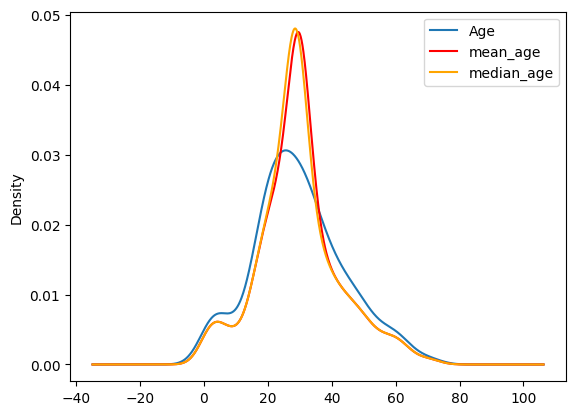

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde', ax=ax)
X_train['mean_age'].plot(kind = 'kde', ax=ax, color = 'red')
X_train['median_age'].plot(kind = 'kde', ax=ax, color = 'orange')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

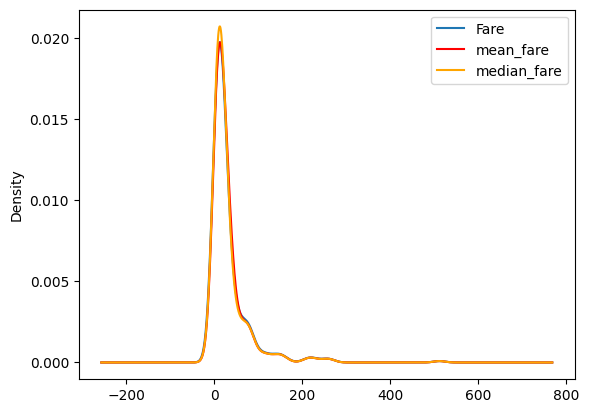

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde', ax=ax)
X_train['mean_fare'].plot(kind = 'kde', ax=ax, color = 'red')
X_train['median_fare'].plot(kind = 'kde', ax=ax, color = 'orange')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

In [41]:
X_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
mean_age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
median_age,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
mean_fare,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
median_fare,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


<Axes: >

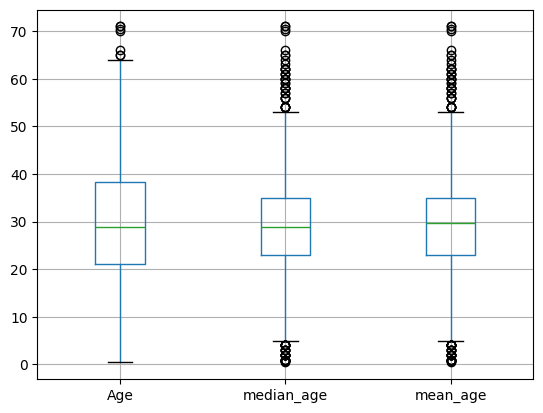

In [46]:
X_train[['Age', 'median_age', 'mean_age']].boxplot()

<Axes: >

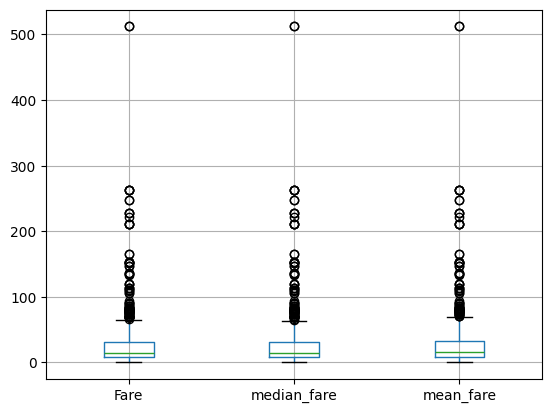

In [47]:
X_train[['Fare', 'median_fare', 'mean_fare']].boxplot()

# **Sklearn**

In [58]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [48]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [49]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare']),
], remainder = 'passthrough')

In [59]:
trf.fit(X_train1)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [62]:
trf.named_transformers_['imputer1'].statistics_,  trf.named_transformers_['imputer2'].statistics_

(array([28.75]), array([32.61759689]))

In [63]:
X_train1 = trf.transform(X_train1)
X_test1 = trf.transform(X_test1)

In [64]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

using random values

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [92]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 imputation:  951.7275570187172
Age Variance after -1 imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 imputation:  47219.20265217623
Fare Variance after -1 imputation:  2378.5676784883503


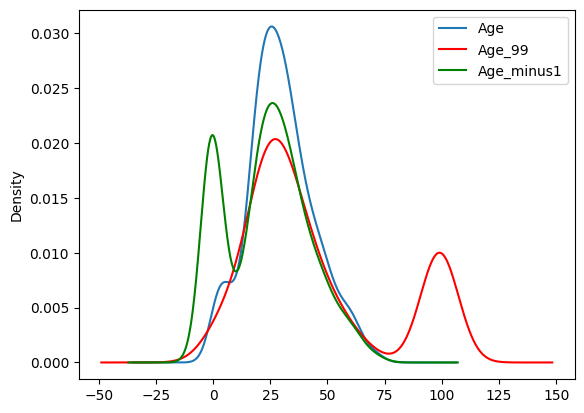

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

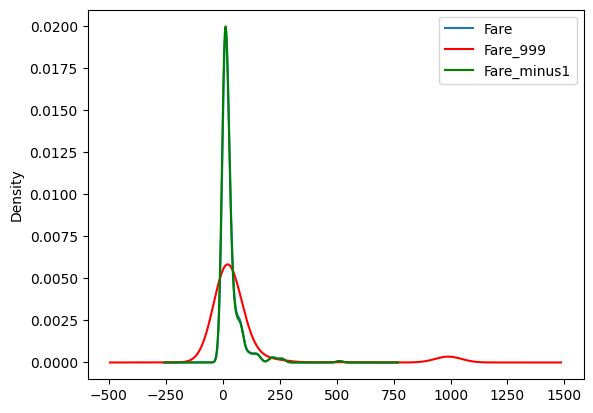

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [79]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,161.898180,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.573853,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.341135,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,256.093015,114.394141
Fare_999,161.898180,2448.197914,11.573853,-159.341135,256.093015,46386.875453,777.019816
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,777.019816,2378.567678


In [80]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051351,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032492,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023981,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066669,0.131514
Fare_999,0.051351,1.000000,0.032492,-0.023981,0.066669,1.000000,0.073974
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.073974,1.000000


# **Sklearn**

In [81]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [82]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [83]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [84]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [85]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [87]:
X_train_processed, X_test_processed, _, _ = train_test_split(X, Y, test_size=0.2, random_state=2)

trf.fit(X_train_processed)

X_train = trf.transform(X_train_processed)
X_test = trf.transform(X_test_processed)

In [88]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])